# Detritalpy plotting and statistical tests for the Mataquito River
### CT-1, 2, 3, 4, 5, 6, 7, 8.2, 9, 10, & 11

detritalPy v1.4.2

### I. Import required modules

In [5]:
import detritalpy
import detritalpy.detritalFuncs as dFunc
import pathlib
import matplotlib
import os
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # For improving matplotlib figure resolution
matplotlib.rcParams['pdf.fonttype'] = 42 # For allowing preservation of fonts upon importing into Adobe Illustrator
matplotlib.rcParams['ps.fonttype'] = 42
print('detritalPy version: ',detritalpy.__version__)

detritalPy version:  1.4.3


### II. Import the dataset as an Excel file
This step must by run initially, and should be repeated if any changes are made to the dataset in Excel. The simplest way to load data is to place the Excel file(s) in the same directory or a sub-directory of the Jupyter Notebook file. For more options, please refer to dataLoading.ipynb.

In [6]:
# Specify file paths to data input file(s)
dataToLoad = ['/Users/Glong1/Desktop/Andes/AndesTG/Mataquito/Zircon/Spreadsheets/CT-1-11_ZrUPb_datasheets.xlsx']

main_df, main_byid_df, samples_df, analyses_df = dFunc.loadDataExcel(dataToLoad, mainSheet='Samples', dataSheet='ZrUPb', ID_col = 'Sample_ID')

Optional: run the cell below to plot a distribution of sample size (number of analyses per sample) in the dataset

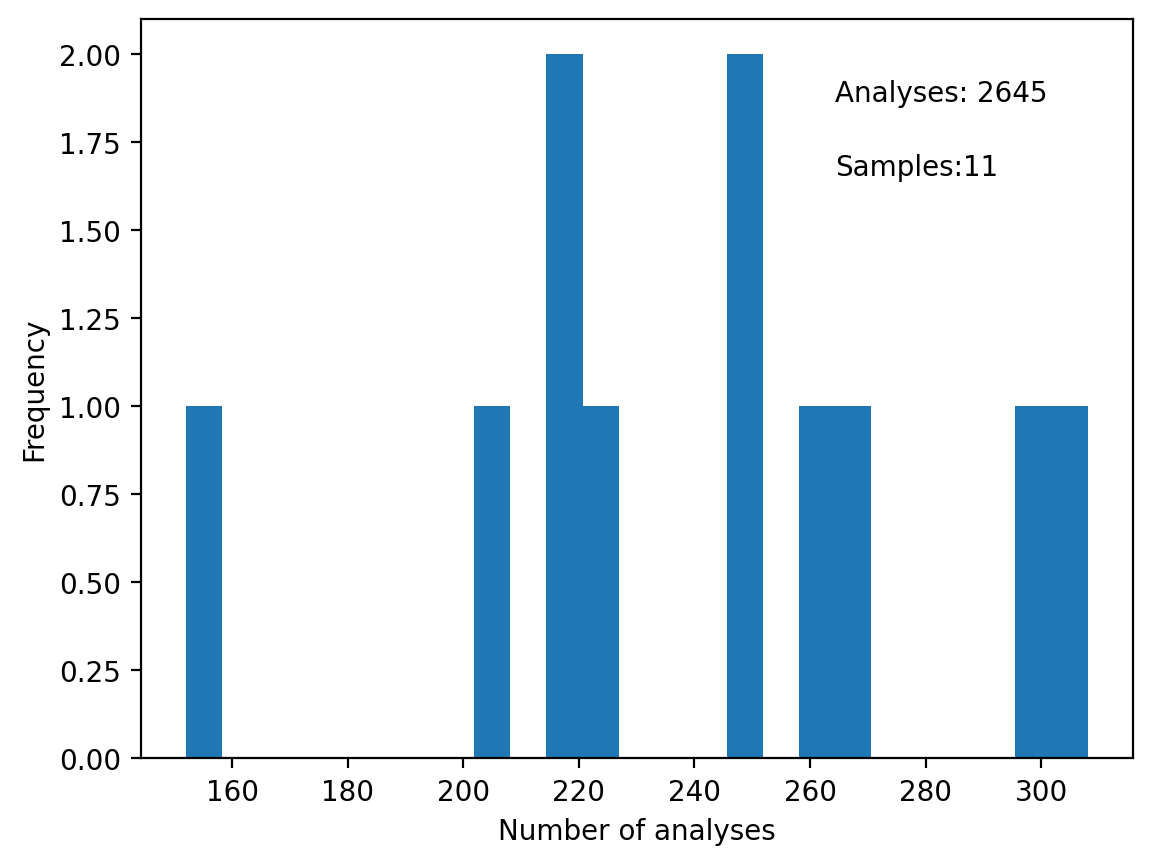

In [7]:
dFunc.plotSampleDist(main_byid_df, numBins=25)

### III. Select samples
Individual or groups of samples can be selected by entering their unique Sample ID's in an array or tuple. This sample list will be used for all subsequent plotting and analysis functions.

In [8]:
sampleList = ['CT-1','CT-2','CT-3','CT-4','CT-5','CT-6','CT-7','CT-8.2','CT-9','CT-10','CT-11']

sigma = '2sigma' # Uncertainty level of U-Pb dates, options: '1sigma' or '2sigma'

ages, errors, numGrains, labels = dFunc.sampleToData(sampleList, main_byid_df, sigma=sigma);

## Plot detrital age distributions
Plot detrital age distributions as cumulative distribution functions (CDFs), probability density plots (PDPs), kernal density estimations (KDEs), histograms, and pie diagrams. Plotting options must be selected below.

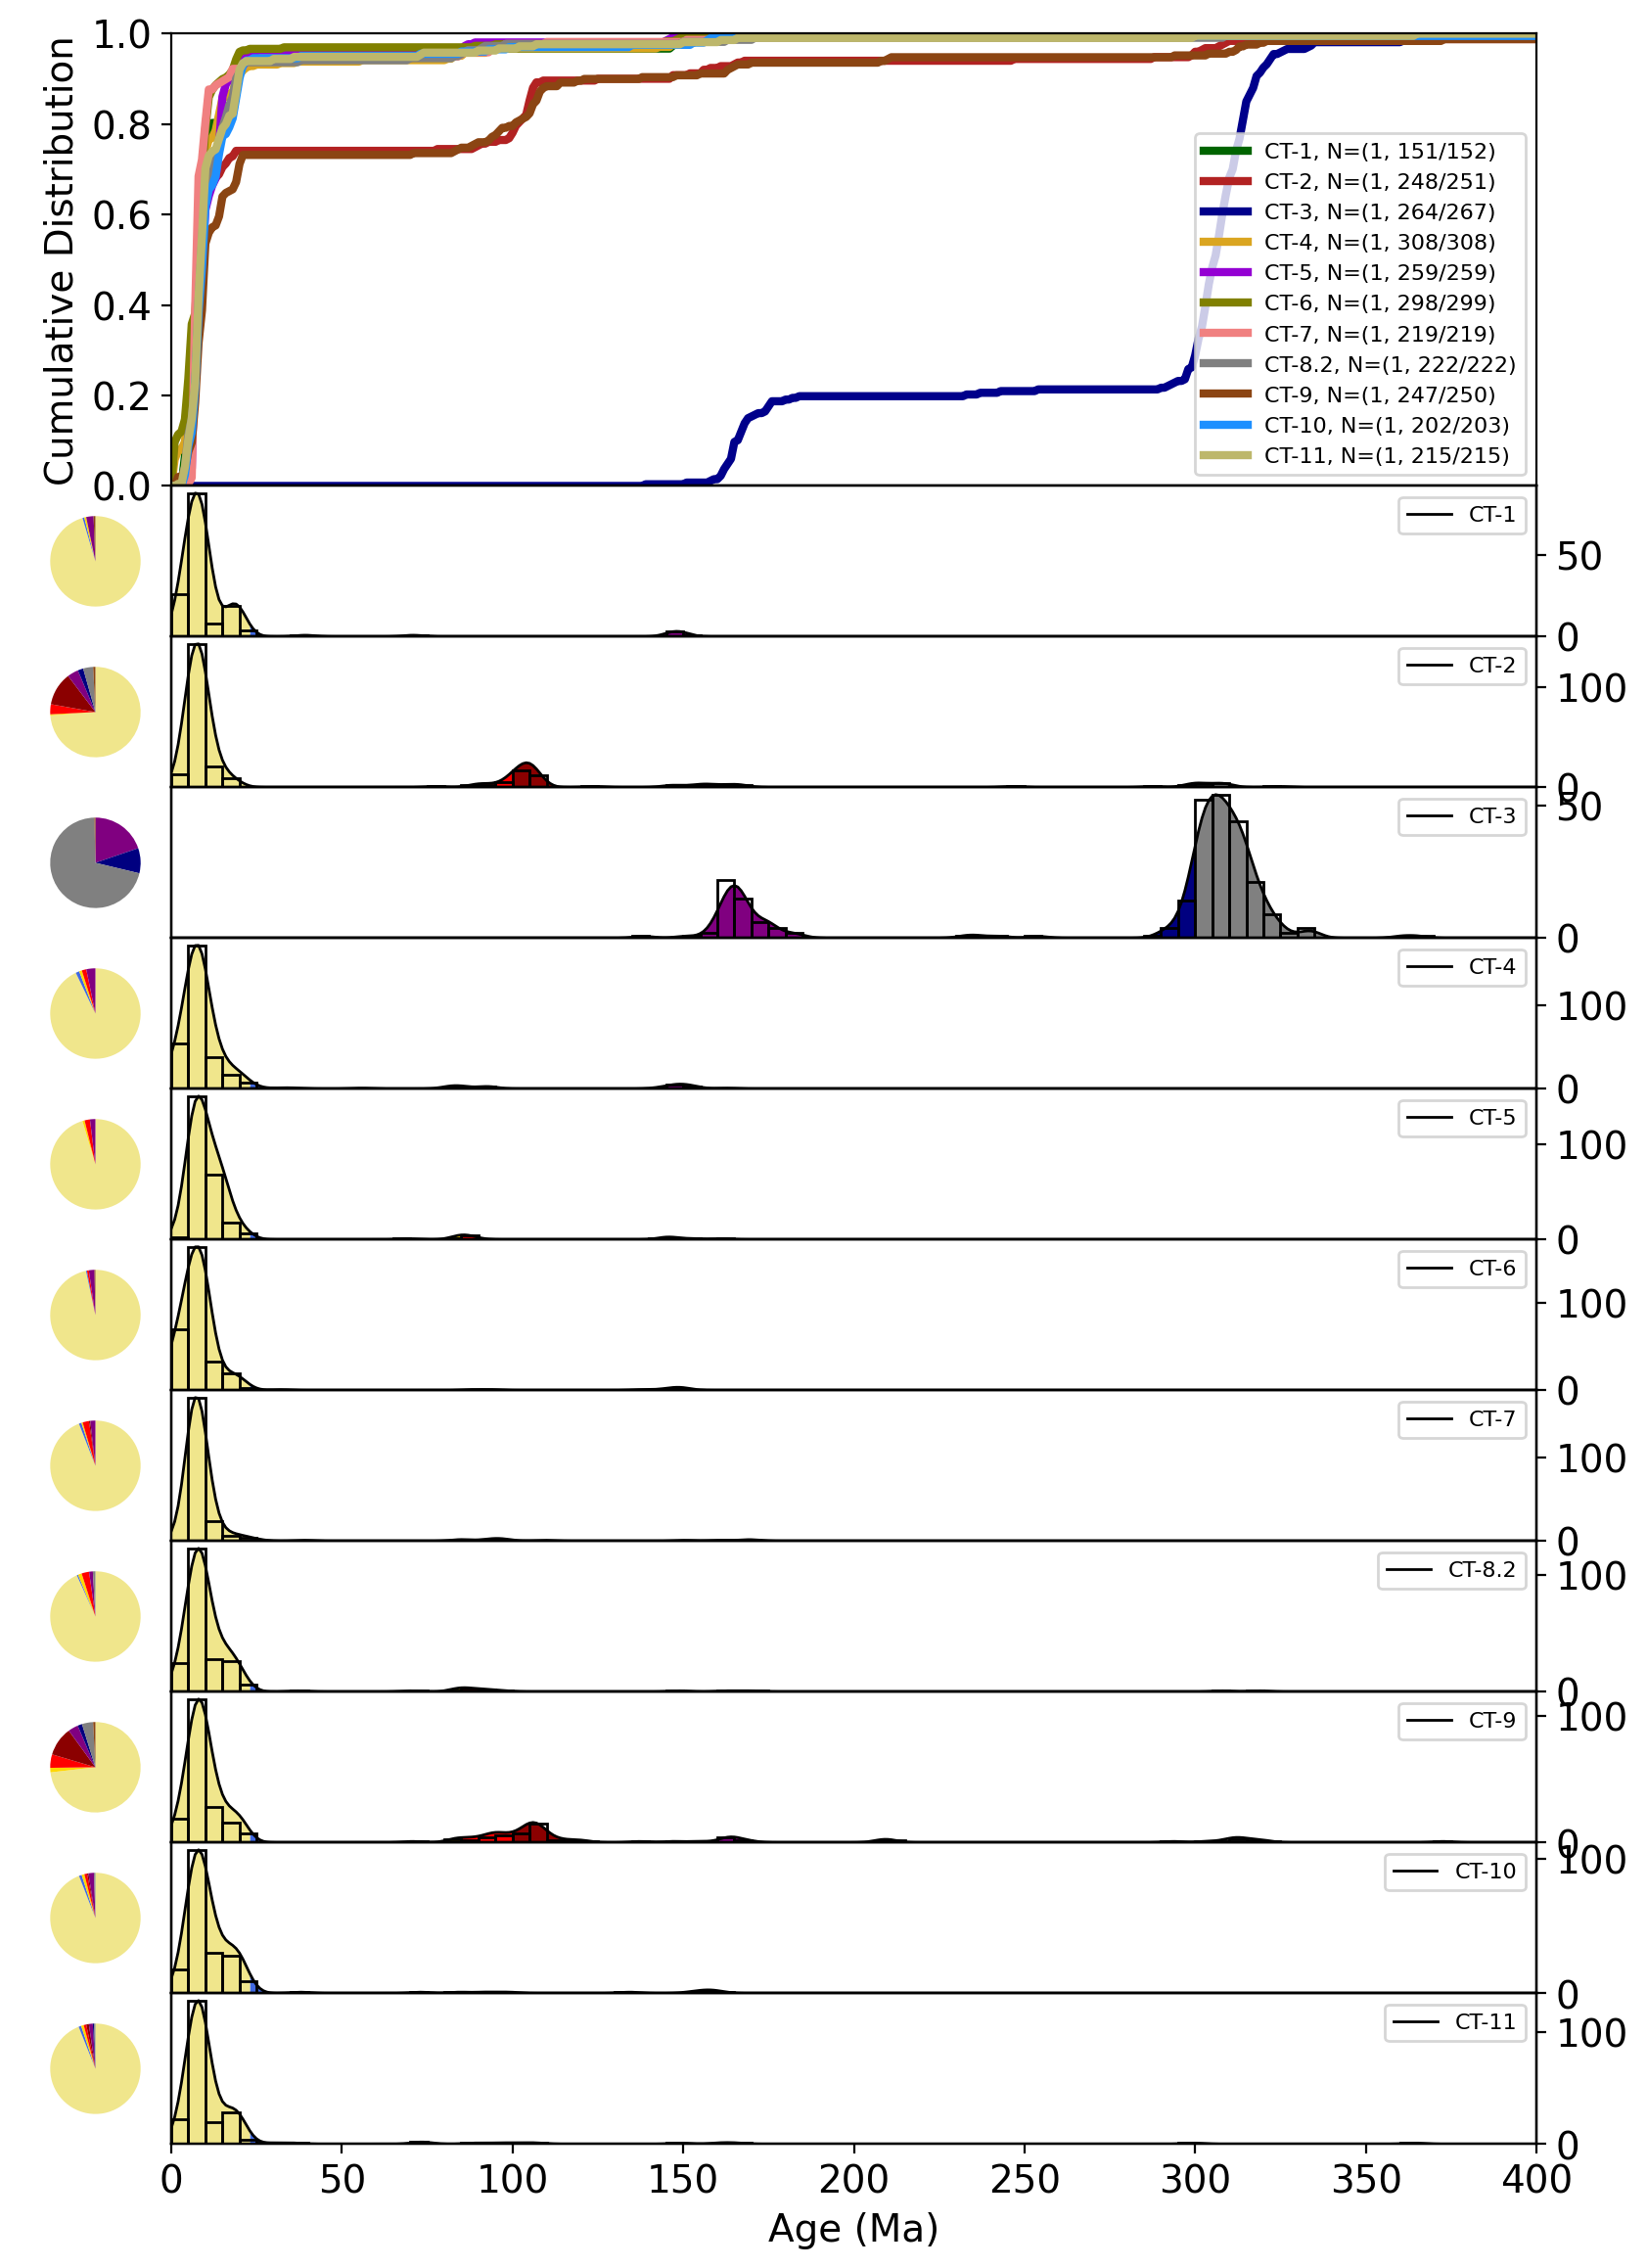

In [11]:
# Enter plot options below
whatToPlot = 'both' # Options: cumulative, relative, or both
separateSubplots = True # Set to True to plot each relative age distribution in a separate subplot (allows histogram and pie)

# Specify the age range (Myr) that you want to plot
x1 = 0
x2 = 400
plotLog = False # Set to True to plot the x-axis as a log scale

# Specify the plot dimensions
w = 10 # width of the plot
c = 3 # height of CDF panel
h = 5 # height of the relative panel (only required if separateSubplots is False). Options: 'auto' or an integer

# Specify the interval (Myr) over which distributions are calculated
xdif = 1 # Note: an interval of 1 Myr is recommended

# Cumulative distribution options
plotCDF = True # Plot the CDF discretized at xdif interval
plotCPDP = False # Plot the cumulative PDP
plotCKDE = False # Plot the cumulative KDE
plotDKW = False # Plot the 95% confidence interval of the CDF (Dvoretsky-Kiefer-Wolfowitz inequality)

# Relative distribution options
normPlots = False # Will normalize the PDP/KDE if equals True (if separateSubplots is True)

plotKDE = True # Set to True if want to plot KDE
colorKDE = False # Will color KDE according to same coloration as used in CDF plotting
colorKDEbyAge = True # Will color KDE according to age populations if set to True
bw = 3 # Specify the KDE bandwidth. Options are 'ISJ', 'optimizedFixed', 'optimizedVariable', or a number (bandwidth in Myr; e.g., bw = 3)
bw_x = None # X-axis location of bandwidth split (only used if multiple KDE values are specified in a list). Set to None if not using a split bandwidth.

plotPDP = False # Set to True if want to plot PDP
colorPDP = False # Will color PDP according to same coloration as used in CDF plotting
colorPDPbyAge = False # Will color PDP according to age populations if set to True

plotColorBar = False # Color age categories as vertical bars, can add white bars to create blank space between other colored bars

plotHist = True # Set to True to plot a histogram (only available when separateSubplots is True)
b = 5 # Specify the histogram bin size (Myr)

plotPIE = True # Will plot a pie diagram (only available when separateSubplots is True)

# Specify  age categories for colored KDE, PDP, and/or pie plots
# Sharman et al. 2015 scheme
agebins = [0, 23, 65, 85, 100, 135, 200, 300, 500, 4500]
agebinsc = ['khaki','royalblue','gold','red','darkred','purple','navy','gray','saddlebrown']

# Alternative way of specifying age bins
agebins = [[0,23],[23,65],[65,85],[85,100],[100,135],[135,200],[200,300],[300,500],[500,4500]]
agebinsc = ['khaki','royalblue','gold','red','darkred','purple','navy','gray','saddlebrown']

plotAgePeaks = False # Will identify and plot age peaks
agePeakOptions = ['KDE', 0.05, 5, 2, True] # [distType, threshold, minDist, minPeakSize, labels]

# Plot PDP or KDE distributions as a heat map
plotHeatMap = False
heatMapType = 'KDE' # Options: 'PDP' or 'KDE'
heatMap = 'inferno_r'

fig = dFunc.plotAll(sampleList, ages, errors, numGrains, labels, whatToPlot, separateSubplots, plotCDF, plotCPDP, plotCKDE, 
                    plotDKW, normPlots, plotKDE, colorKDE, colorKDEbyAge, plotPDP, colorPDP, colorPDPbyAge, plotColorBar, 
                    plotHist, plotLog, plotPIE, x1, x2, b, bw, xdif, agebins, agebinsc, w, c, h, plotAgePeaks, agePeakOptions,
                    CDFlw=3, KDElw=1, PDPlw=1, bw_x=bw_x, plotHeatMap=plotHeatMap, heatMapType=heatMapType, heatMap=heatMap)

Optional: Run the cell below to save the figure as a pdf file

In [6]:
# Saves figure to a folder named 'Figures'
try:
    os.makedirs('Figures', exist_ok=True)
    # Change name to current mixture
    # Save figure as png, you can change to save the figure as a pdf, png, jpeg, svg, etc
    fig.savefig('Figures/DZageDistributionsall.svg')
    fig.savefig('Figures/DZageDistributionsall.png')
    print("Figures Created")
except Exception as e:
    print(f"Error saving figures: {e}")

Figures Created


In [ ]:
# Select the column to plot in the upper plot
variableName = 'Th_U'
plotError = False # Select True to plot error bars 
variableError = 0.05 # Required if plotError = True: Select the variable name or specify the error as a percentage (e.g., 0.05)

# Specify the age range (Myr) that you want to plot
x1 = 0
x2 = 300
plotLog = False # Set to True to plot the x-axis as a log scale

# Specify the y-axis scale
autoScaleY = False
y1 = 0
y2 = 2

# Specify the plot dimensions
w = 10 # width of CDF panel and distribution plots
t = 3 # height of top panel
l = 1 # height of the bottom panel

# Specify the interval (Myr) over which distributions are calculated
xdif = 1

# Relative distribution options
normPlots = False # Will normalize the PDP/KDE if yes to True

plotKDE = False # Set to True if want to plot KDE
colorKDE = False # Will color KDE according to same coloration as used in CDF plotting
colorKDEbyAge = True # Will color KDE according to age populations if set to True
bw = 10 # Specify the KDE bandwidth. Options are 'optimizedFixed', 'optimizedVariable', or a number (bandwidth in Myr)

plotPDP = True # Set to True if want to plot PDP
colorPDP = False # Will color PDP according to same coloration as used in CDF plotting
colorPDPbyAge = True # Will color PDP according to age populations if set to True

plotColorBar = False # Color age categories as vertical bars, can add white bars to create blank space between other colored bars

plotHist = False # Set to True to plot a histogram
b = 5 # Specify the histogram bin size (Myr)

#Sharman et al. 2015 scheme
agebins = [0, 23, 65, 85, 100, 135, 200, 300, 500, 4500]
agebinsc = ['slategray','royalblue','gold','red','darkred','purple','navy','gray','saddlebrown']

plotMovingAverage = True
windowSize = 25

figDouble = dFunc.plotDouble(sampleList, main_byid_df, ages, errors, numGrains, labels, variableName, plotError, variableError, normPlots,
                     plotKDE, colorKDE, colorKDEbyAge, plotPDP, colorPDP, colorPDPbyAge, plotHist, x1, x2, autoScaleY, y1, y2, b,
                     bw, xdif, agebins, agebinsc, w, t, l, plotLog, plotColorBar, plotMovingAverage, windowSize, KDElw=1, PDPlw=1);

Optional: Run the cell below to save the figure as a pdf file

In [ ]:
pathlib.Path('Output').mkdir(parents=True, exist_ok=True) # Recursively creates the directory and does not raise an exception if the directory already exists 
figDouble.savefig('Output/doublePlot.pdf')

### Plot detrital age populations as a bar graph

In [8]:
sampleList = ['CT-1','CT-2','CT-3','CT-4','CT-5','CT-6','CT-7','CT-8.2','CT-9','CT-10','CT-11']

ages, errors, numGrains, labels = dFunc.sampleToData(sampleList, main_byid_df, sigma = '1sigma');

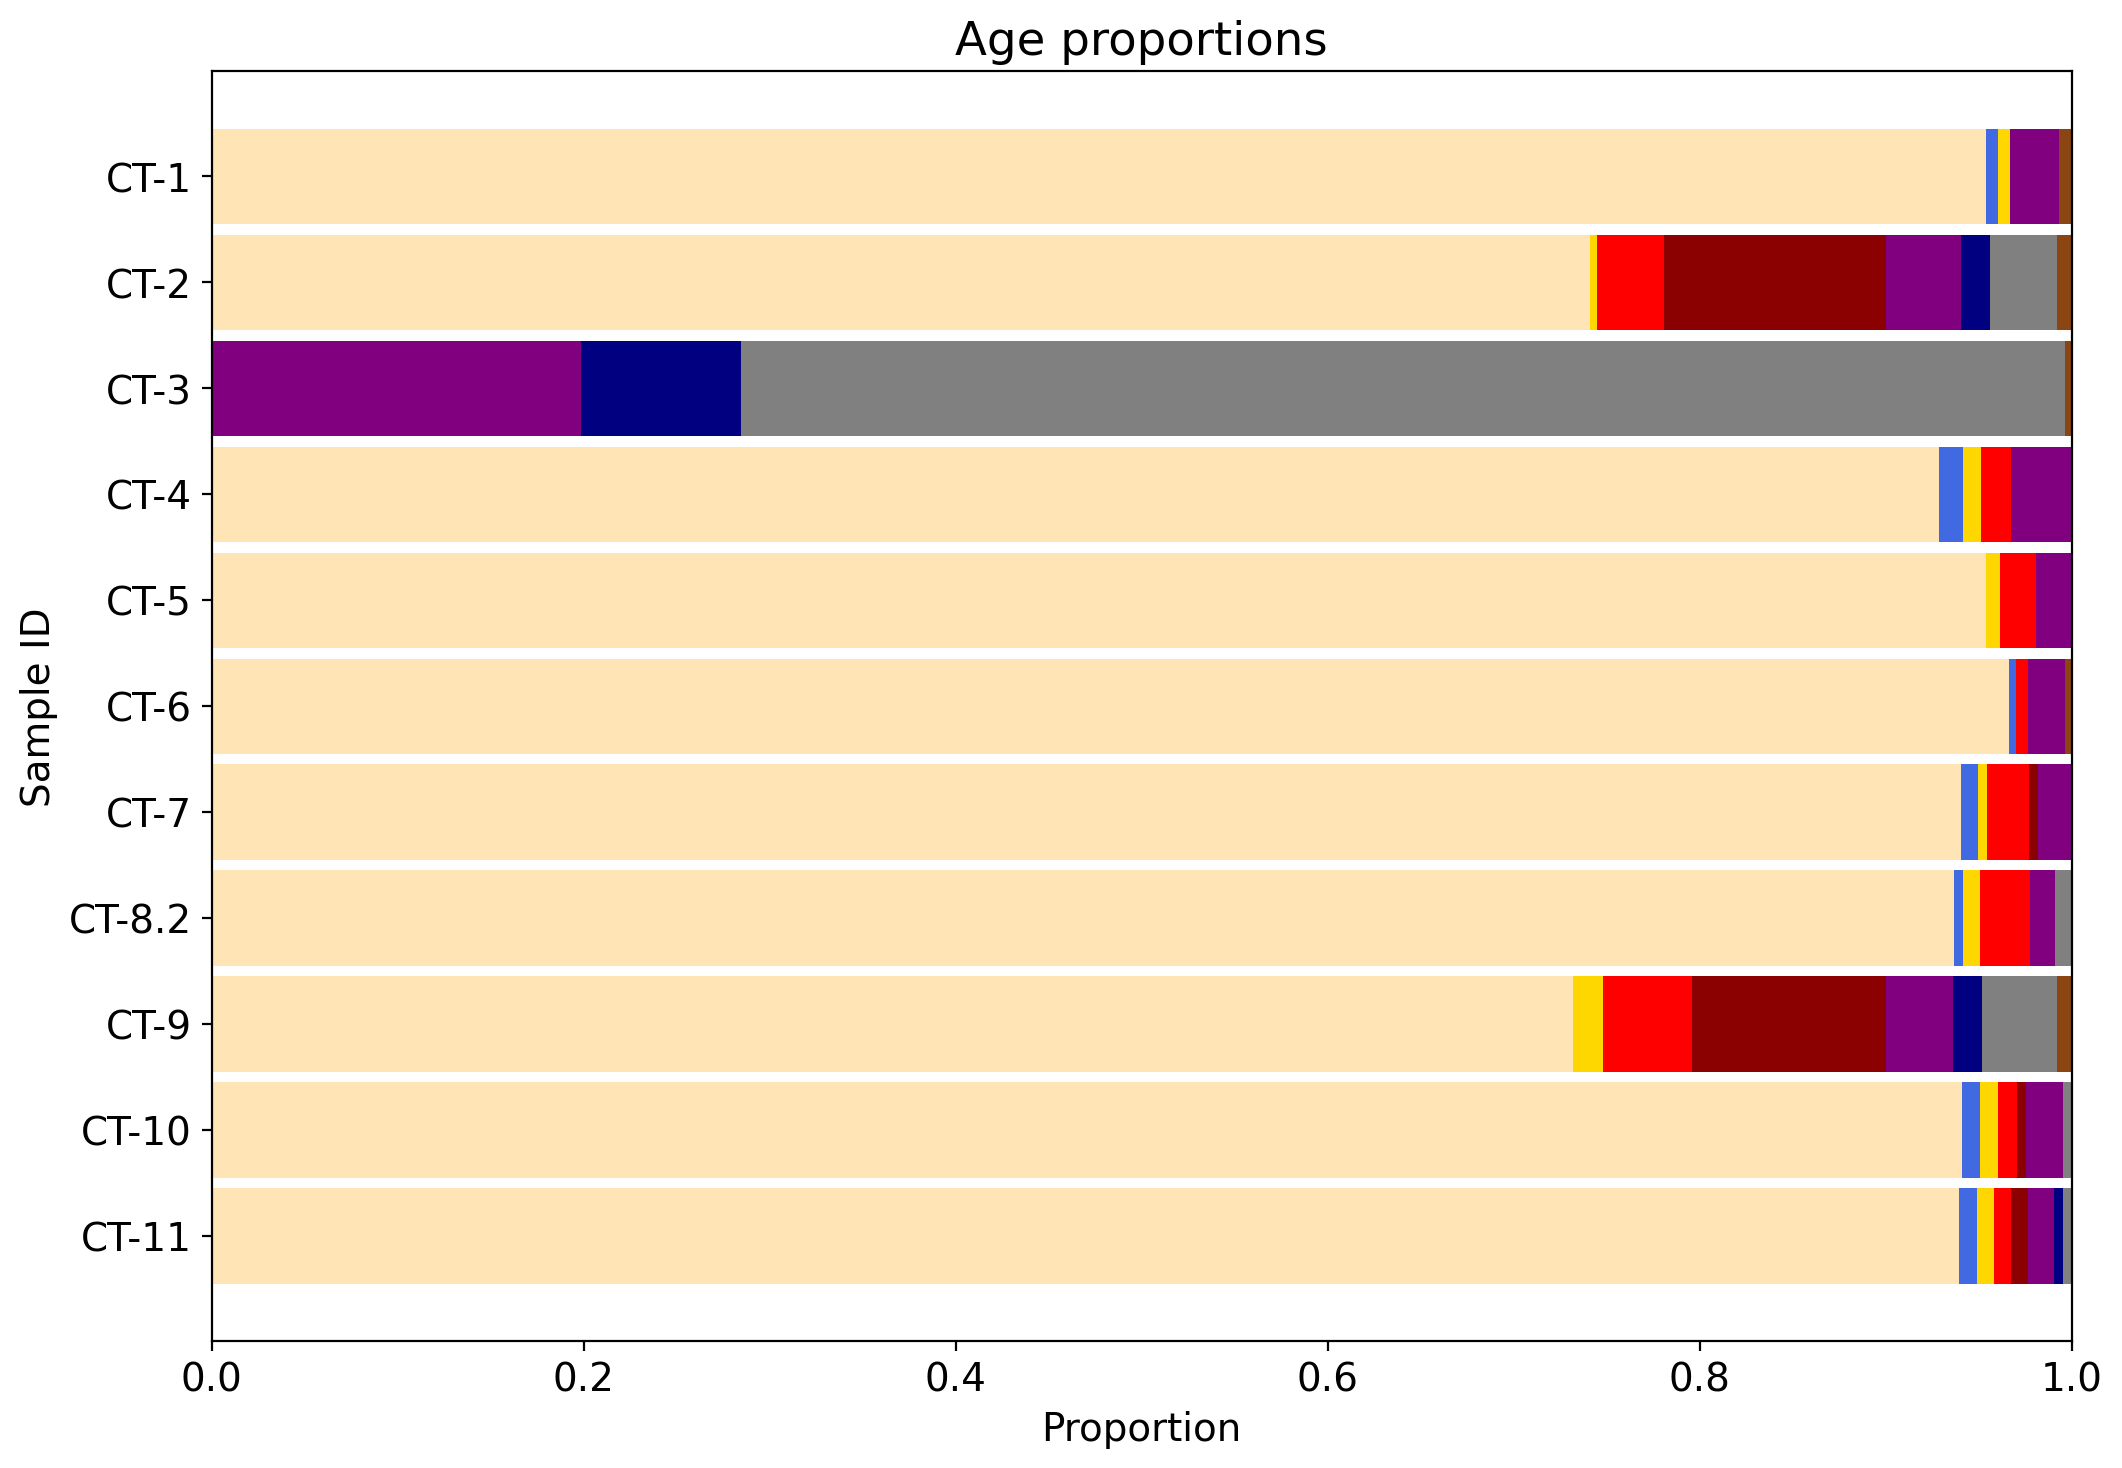

In [9]:
# Specify plot parameters
overlap = 0.9
width = 6
height = 0.75

# Specify  age population boundaries and colors
# Sharman et al. 2015 scheme
agebins = [0, 23, 65, 85, 100, 135, 200, 300, 500, 4500]
agebinsc = ['moccasin','royalblue','gold','red','darkred','purple','navy','gray','saddlebrown']

# Specify whether to separate grouped sample lists into individual samples
separateGroups = True # Set to True to separate groups into their individual samples

fileName = 'ageProportionsCT-1-11.csv' # Specify file name to save

savePlot = False #Specify whether to save output plots as PDF files

dFunc.ageProportionsCSV(ages, errors, numGrains, labels, agebins, fileName)
figBar = dFunc.plotBar(width, height, overlap, main_byid_df, sampleList, ages, numGrains, labels, agebins, agebinsc, separateGroups, savePlot)

## Plot sample locations on an interactive map
Samples with coordinate information (latitude and longitude in WGS84 coordinates) can be plotted on an interactive map. This functionality requires the following modules must be installed: folium and vincent. These can be installed via the python command line prompt by entering "pip install folium" and "pip install vincent".

In [10]:
# Specify whether age distributions should be enabled (can be viewed by clicking on samples)
plotMapKDE = True # Choose True to enable KDEs when samples are selected
plotMapPDP = False # Choose True to enable PDPs when samples are selected
plotCumulative = False # Choose True to plot either a cumulative KDE or PDP. A discretized CDF will be plotted if KDE and PDP are both set to False

# Specify the upper age limit that you want to plot
x2 = 400
# Specify the KDE bandwidth
bw = 1.5 # Specify the KDE bandwidth. Options are 'optimizedFixed', 'optimizedVariable', or a number (bandwidth in Myr)

mapType = 'World_Topo_Map' # Options: 'NatGeo_World_Map', 'World_Street_Map', 'World_Topo_Map', 'World_Light_Gray',
                             # 'World_Shaded_Relief', 'World_Terrain_Base', 'World_Hillshade', 'World_Physical_Map'

exportKML = True
descrpt = 'Unit' # Description to be included with each sample
    
dFunc.plotFoliumMap(sampleList, main_byid_df, ages, errors, numGrains, plotMapKDE, 
                             plotMapPDP, plotCumulative, x2, bw, mapType, exportKML, descrpt)

0.2972249999999974
1.2735800000000097
latitude 0.2972249999999974 -> (0.5, 9)
longitude 1.2735800000000097 -> (2.5, 7)


## Plot and export maximum depositional age (MDA) calculations
Take it out of comment if you are using MDA

Calculate the maxmium depositional age (MDA) for a sample or group of samples. Results will be exported to a CSV file. Individual plots will be made for each sample or group of samples showing the youngest grains and different calculations of the maxmimum depositional age.

In [12]:
"""# Specify output CSV file
fileName = 'MDA.csv'

# Specify whether to create a plot showing youngest ages and MDA calculations
makePlot = True

# Specify how grains are sorted on the plot: by best age, best age + 1 sigma error, or best age + 2 sigma error
sortBy = '1sigma' # Options: 'mean', '1sigma', '2sigma'

# Specify plot parameters
plotWidth = 8
plotHeight = 5
barWidth = 0.25 # A value of 1 yields 100% overlap
ageColors = ['blue','red','green'] # Specify color of horizontal bars for YSG, YC1S(2+), and YC2s(3+), respectively
fillMDACalcs = True # Select True to shade each MDA calculation within 1 sigma confidence limits
alpha = 0.25 # Specifies the transparency of the MDA calculation colors

figMDA = dFunc.MDAtoCSV(sampleList, ages, errors, numGrains, labels, fileName, sortBy, barWidth, plotWidth, plotHeight, 
                        ageColors, alpha, makePlot, fillMDACalcs)"""

"# Specify output CSV file\nfileName = 'MDA.csv'\n\n# Specify whether to create a plot showing youngest ages and MDA calculations\nmakePlot = True\n\n# Specify how grains are sorted on the plot: by best age, best age + 1 sigma error, or best age + 2 sigma error\nsortBy = '1sigma' # Options: 'mean', '1sigma', '2sigma'\n\n# Specify plot parameters\nplotWidth = 8\nplotHeight = 5\nbarWidth = 0.25 # A value of 1 yields 100% overlap\nageColors = ['blue','red','green'] # Specify color of horizontal bars for YSG, YC1S(2+), and YC2s(3+), respectively\nfillMDACalcs = True # Select True to shade each MDA calculation within 1 sigma confidence limits\nalpha = 0.25 # Specifies the transparency of the MDA calculation colors\n\nfigMDA = dFunc.MDAtoCSV(sampleList, ages, errors, numGrains, labels, fileName, sortBy, barWidth, plotWidth, plotHeight, \n                        ageColors, alpha, makePlot, fillMDACalcs)"

Optional: Run the cell below to save the figure as an image file

In [13]:
"""pathlib.Path('Output').mkdir(parents=True, exist_ok=True) # Recursively creates the directory and does not raise an exception if the directory already exists 
figMDA.savefig('Output/MDAplots.png')"""

"pathlib.Path('Output').mkdir(parents=True, exist_ok=True) # Recursively creates the directory and does not raise an exception if the directory already exists \nfigMDA.savefig('Output/MDAplots.png')"

## Multi-dimensional scaling
Create a multi-dimensional scaling (MDS) plot for individual samples or groups of samples. <i><b>Revised and updated in detritalpy version 1.3.</b></i>

In [14]:
sampleList = ['CT-1','CT-2','CT-3','CT-4','CT-5','CT-6','CT-7','CT-8.2','CT-9','CT-10','CT-11']

ages, errors, numGrains, labels = dFunc.sampleToData(sampleList, main_byid_df, sigma = '1sigma');

Run the model. Note that this may take a while, depending on the number of initializations (n_init) chosen. Increasing the number of initializations increased the likelihood of finding a more optimal fit (i.e., lower stress).

In [15]:
model = dFunc.MDS_class(ages, errors, labels, sampleList, metric=False, criteria='Vmax', bw=3, n_init='metric', 
                        max_iter=1000, x1=0, x2=4500, xdif=1, min_dim=1, max_dim=3, dim=2)

After the model has been run, a number of figures can be generated, in any order.

The QQ matrix plots each sample CDF against the others. A perfect match falls along the dashed line. <i>Note: This is not recommended for large datasets (e.g., >20 samples or sample groups)</i>

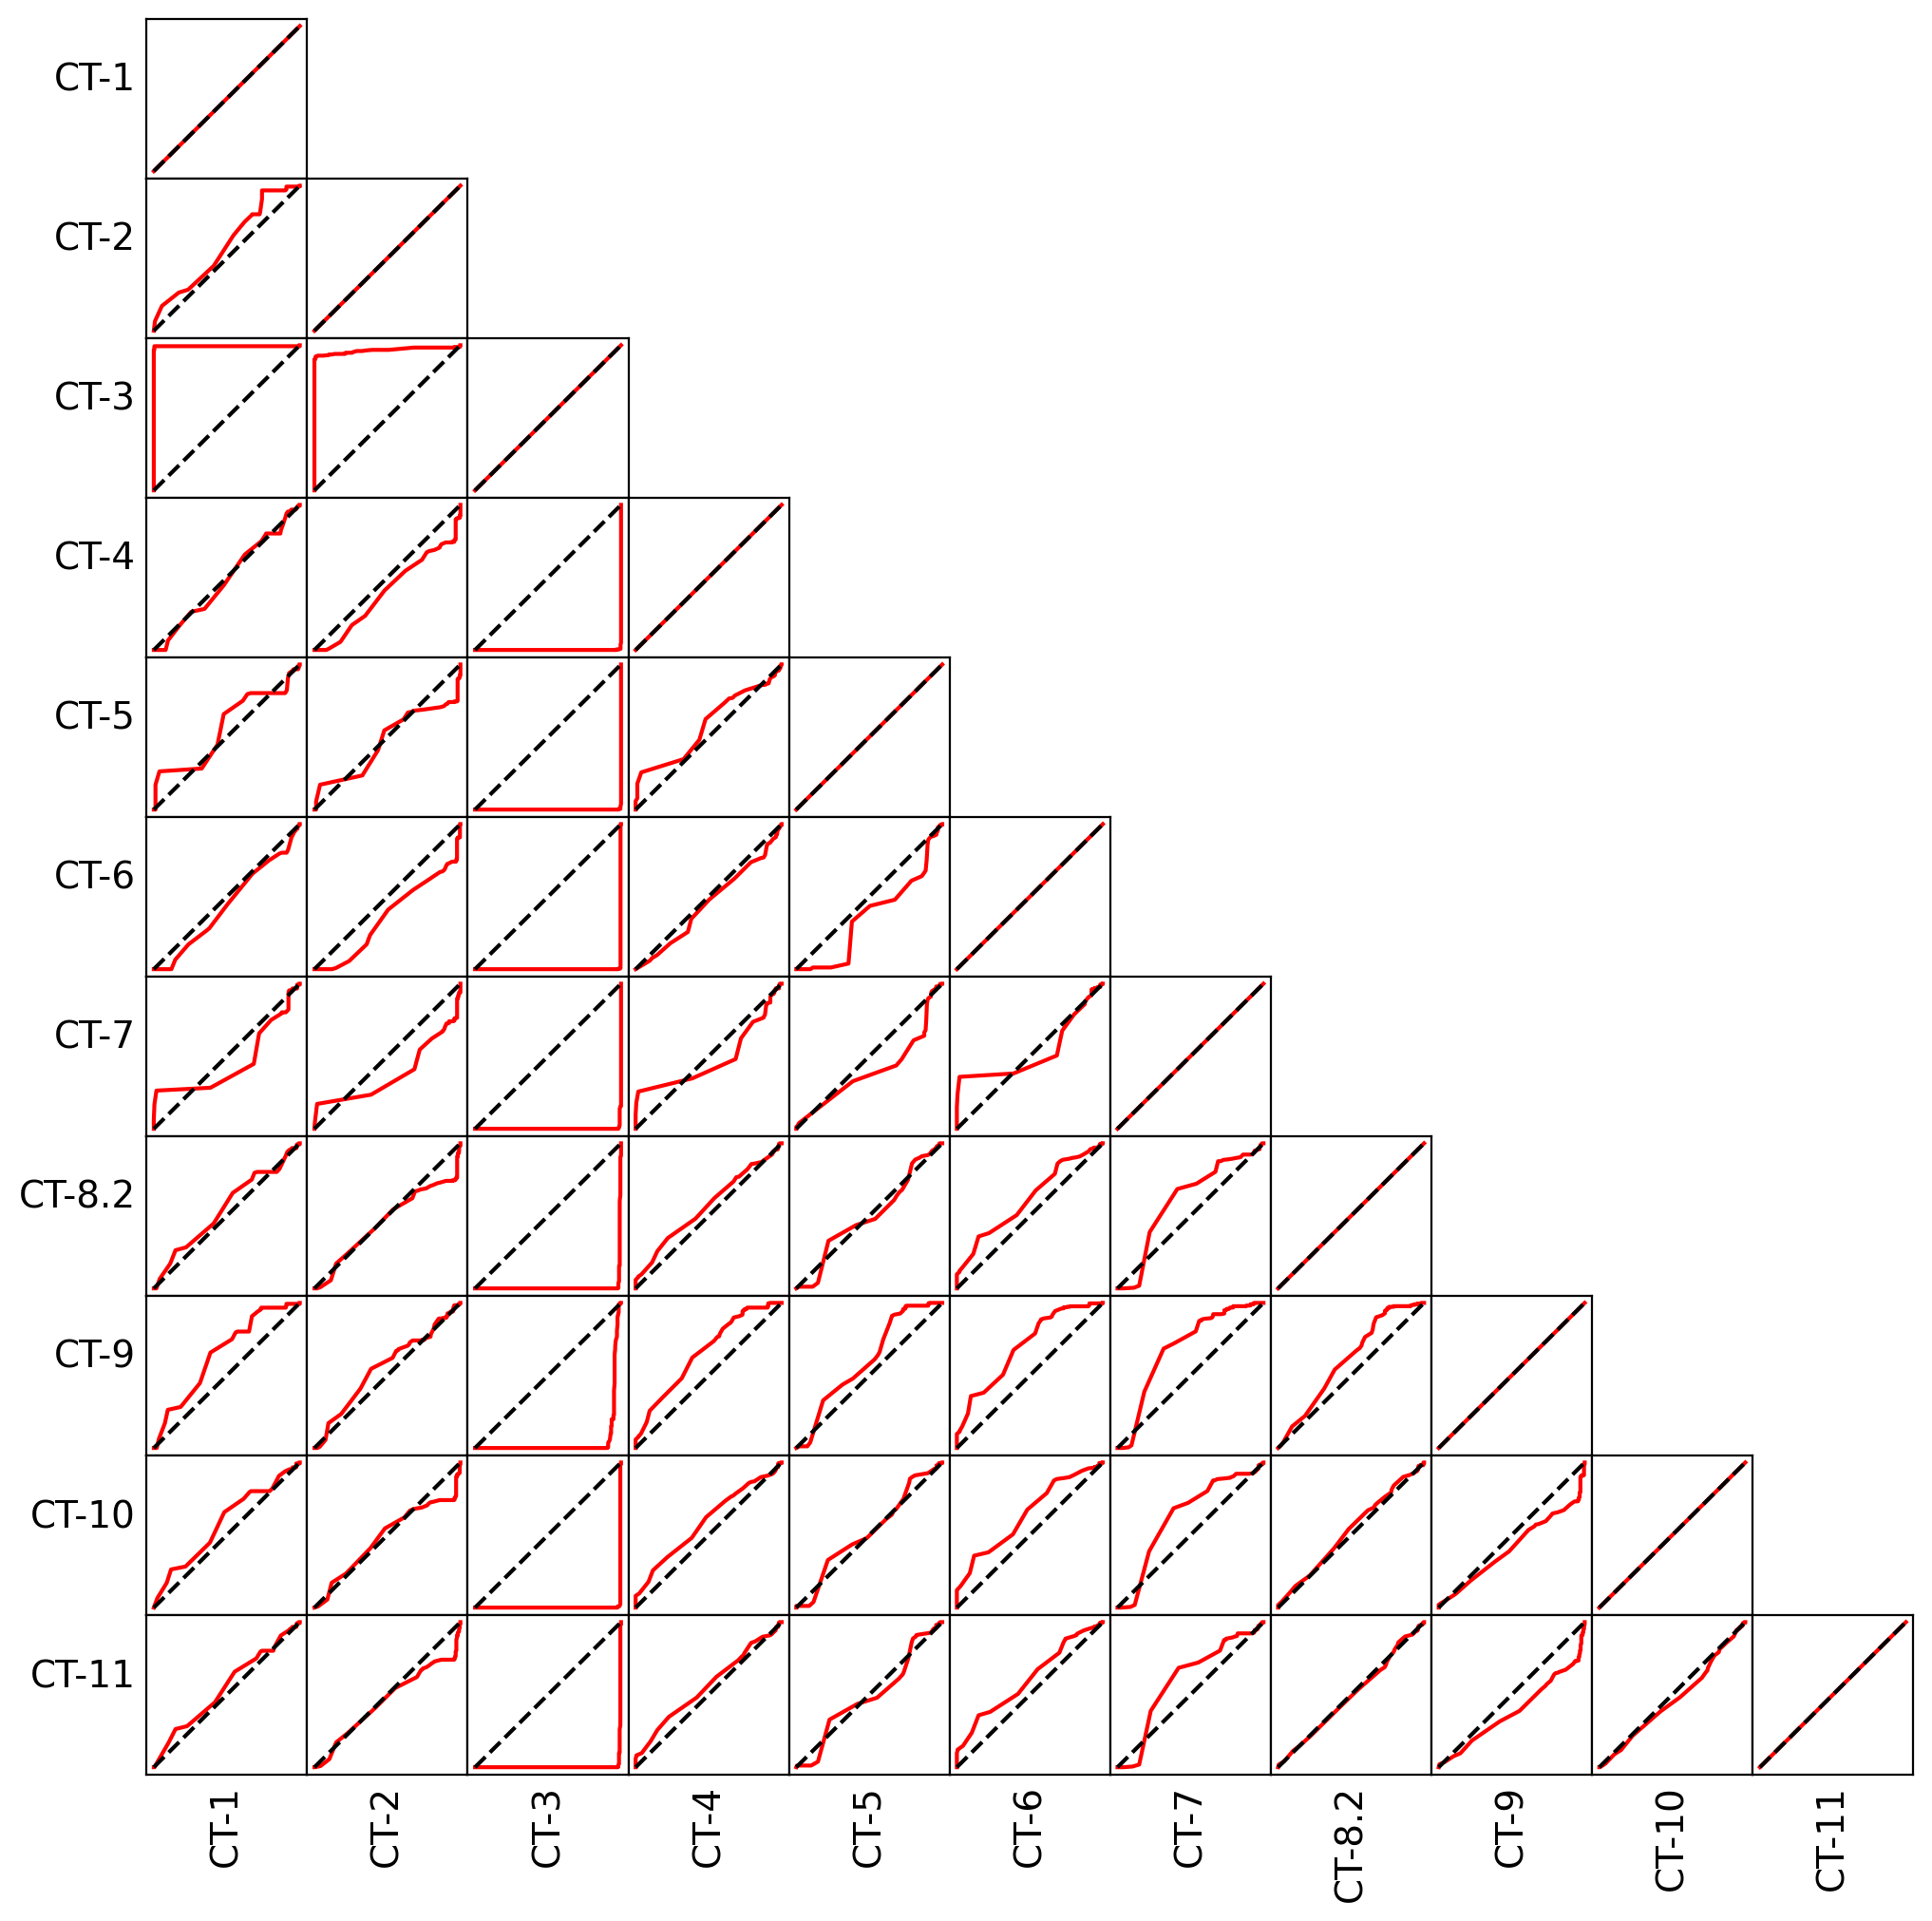

In [16]:
model.QQplot(figsize=(12,12), savePlot=False, fileName='QQplot.pdf', halfMatrix=True)

A heatmap of the sample dissimilarity matrix gives an indication of the data that is going into the MDS algorithm

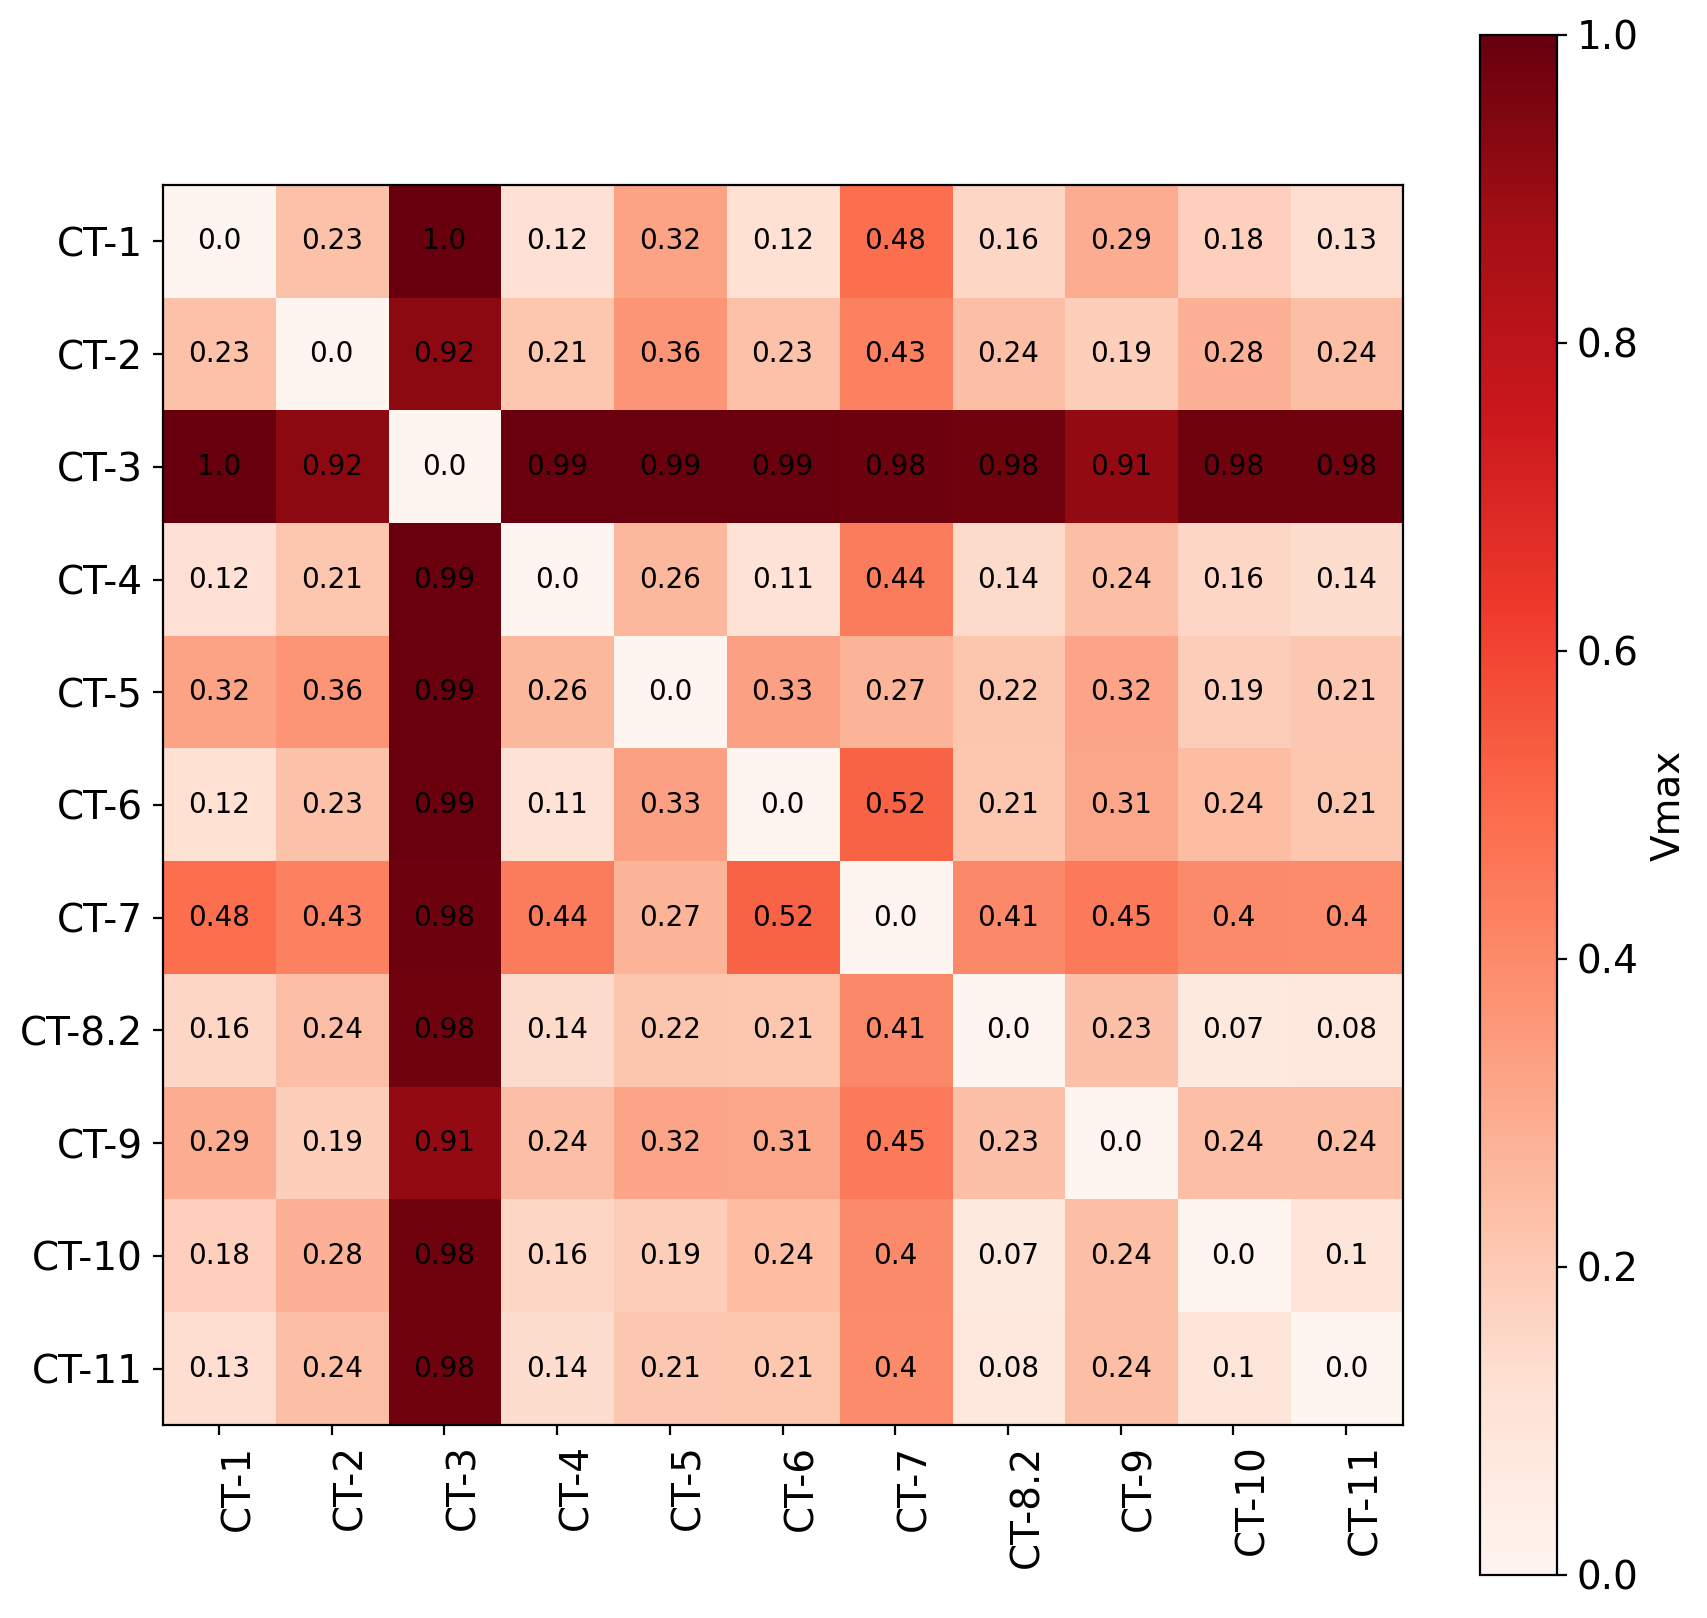

In [17]:
model.heatMap(figsize=(10,10), savePlot=False, fileName='HeatMapPlot.pdf', plotValues=True,
              plotType='dissimilarity', fontsize=10)

By setting the keyword argument plotType to equal 'distance', we can plot the Euclidean distance between sample pairs on the MDS plot. There should be a general correlation with the heat mat above, as samples that are more different should be farther apart.

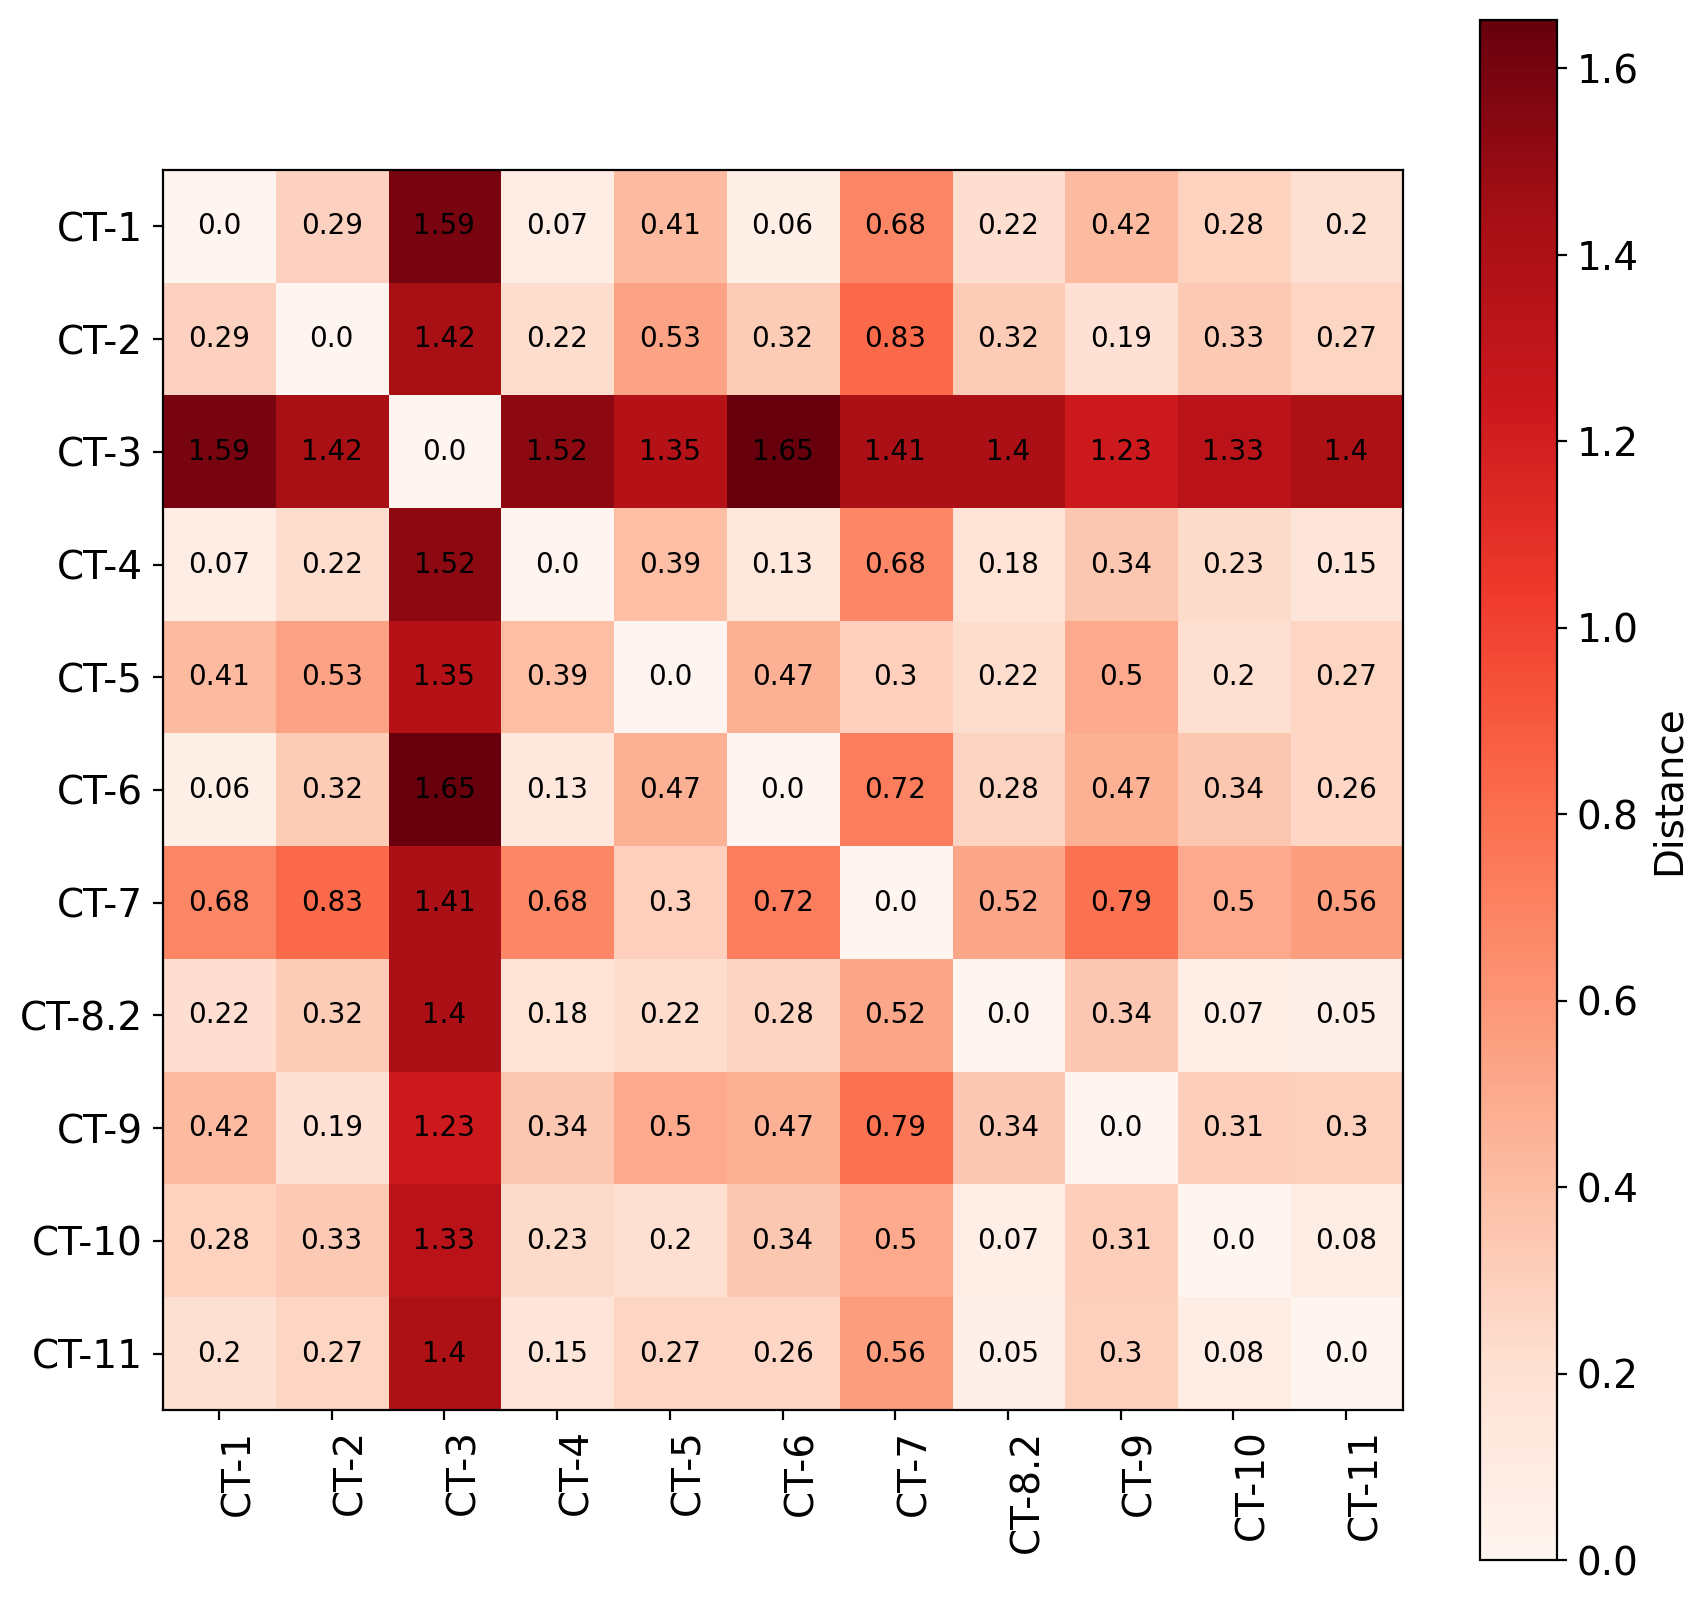

In [18]:
model.heatMap(figsize=(10,10), savePlot=False, fileName='HeatMapPlot.pdf', plotValues=True, plotType='distance', fontsize=10)

A stress plot gives an indication of the goodness-of-fit and how this varies depending on how many dimensions are modeled

<b><i>Note:</i></b> As of scikit-learn v1.4.0, Stress-1 (Kruskal, 1964) is returned for non-metric MDS (i.e., metric=False). For metric MDS (i.e., metric=True), stress values are the "sum of squared distance of the disparities and the distances for all constrained points". Please refer to the sklearn.manifold.MDS documentation for additional details.

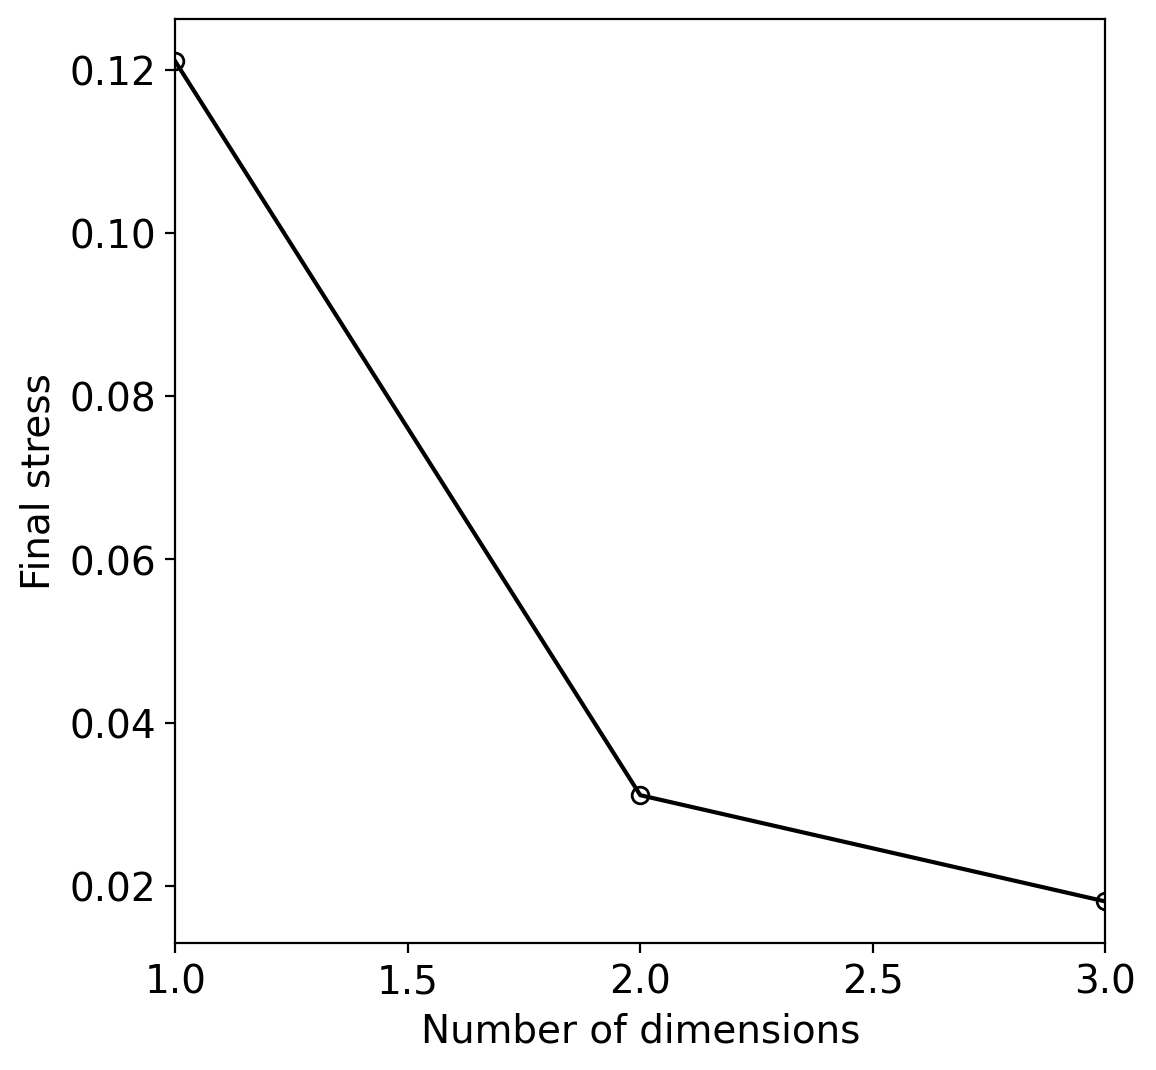

In [19]:
model.stressPlot(figsize=(6,6), savePlot=False, fileName='stressPlot.pdf')

A Shepard plot compares x-y distance on the MDS plot against the dissimilarity metric. Ideally, sample pairs that are far apart on the MDS plot (large distance) will also be the most dissimilar, and visa versa. The amount of scatter gives a sense of the stress value - a lot of scatter means that there's a lot of variance in how well distance on the MDS plot characterizes sample dissimilarity.

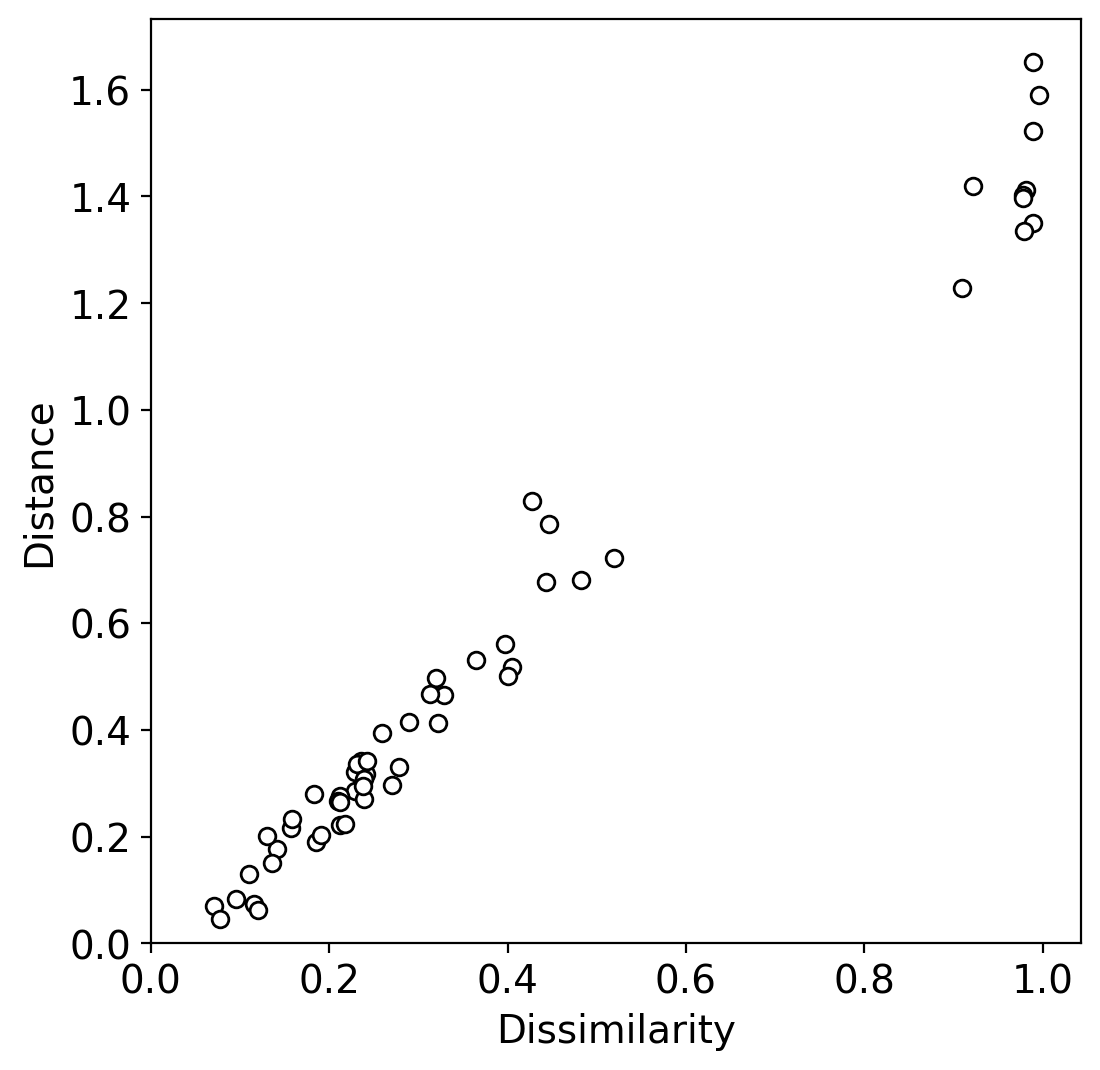

In [20]:
model.shepardPlot(figsize=(6,6), savePlot=False, fileName='shepardPlot.pdf', plotOneToOneLine=False)

The MDS plot is a depiction of sample similarity and dissimilarity (refer to Vermeesch, 2013: Chemical Geology for a more complete description).

Final stress:  0.03112093017188359


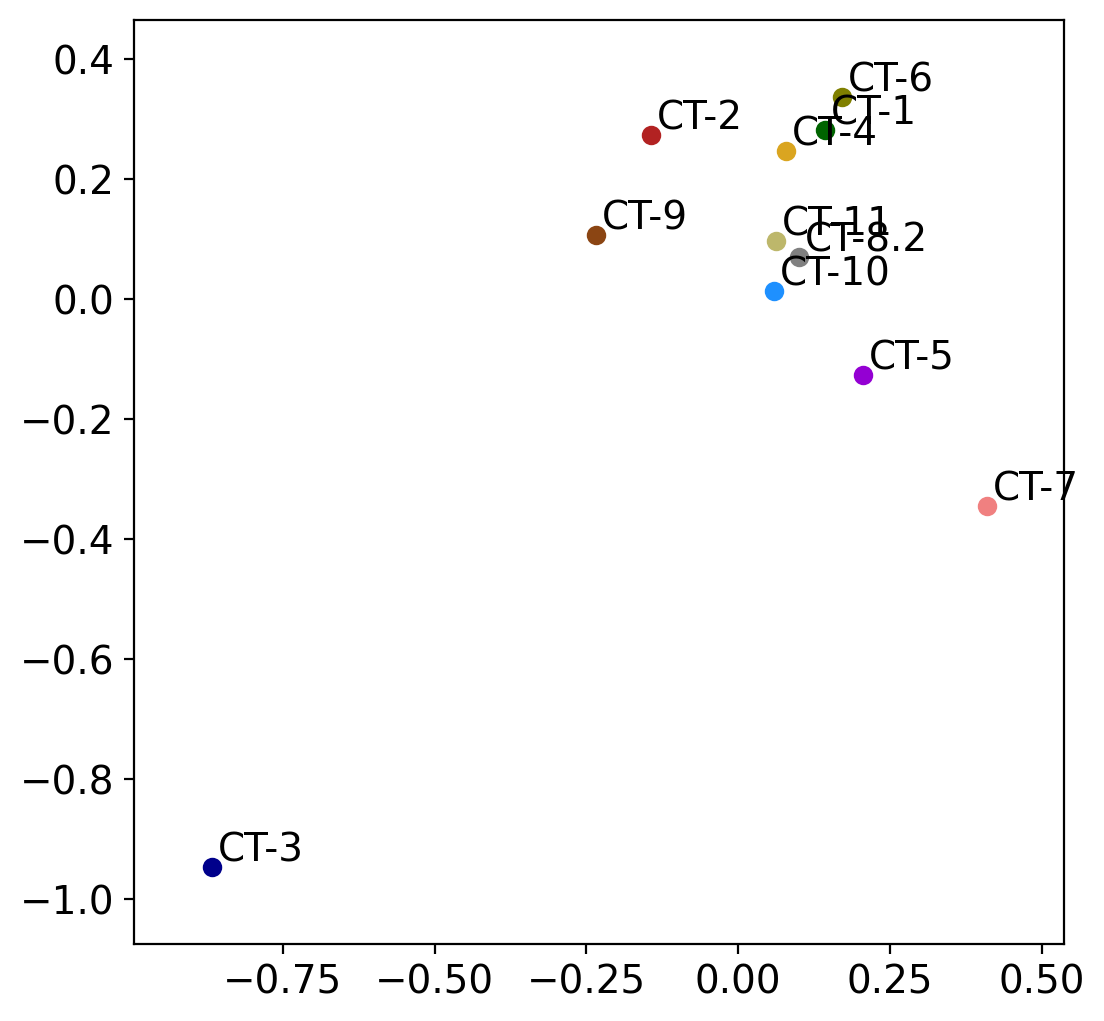

In [21]:
model.MDSplot(figsize=(6,6), savePlot=False, fileName='MDSplot.pdf', plotLabels=True, equalAspect=False, 
              stressType='sklearn')

Note that individual samples can be colored accoring to a categorical variable (column name in the 'Samples' table)

In [22]:
"""model.MDSplot(figsize=(6,6), savePlot=False, fileName='MDSplot.pdf', plotLabels=True, colorBy='Unit', 
              df=main_byid_df, equalAspect=False, stressType='sklearn')"""

"model.MDSplot(figsize=(6,6), savePlot=False, fileName='MDSplot.pdf', plotLabels=True, colorBy='Unit', \n              df=main_byid_df, equalAspect=False, stressType='sklearn')"

Samples can also be plotted as pie diagrams where bins correspond to different age categories

Final stress:  0.03112093017188359


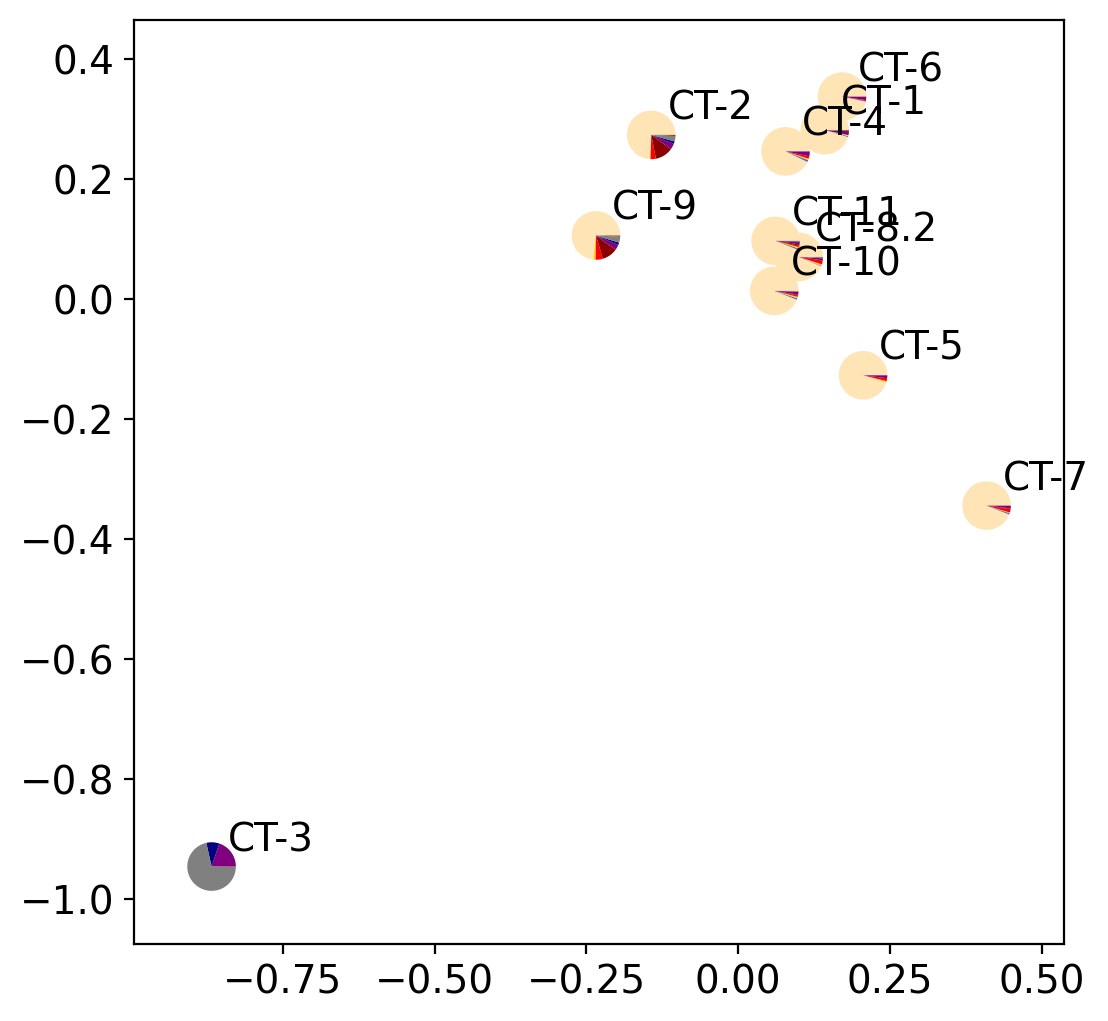

In [23]:
# Sharman et al. 2015 scheme
agebins = [0, 23, 65, 85, 100, 135, 200, 300, 500, 4500]
agebinsc = ['moccasin','royalblue','gold','red','darkred','purple','navy','gray','saddlebrown']

model.MDSplot(figsize=(6,6), savePlot=False, fileName='MDSplot.pdf', plotLabels=True, 
              plotPie=True, pieType='Age', pieSize=0.04, agebins=agebins, agebinsc=agebinsc, equalAspect=False)

## Export sample comparison matrices as a CSV file
Creates matricies of sample comparisons using a number of different metrics (see Saylor and Sundell, 2016). Similiarity, likness, Kolgomorov-Smirnov statistic (Dmax and p-value), Kuiper statistic (Vmax and p-value), and cross-correlation of relative probability density functions. Similiarty, likeness, and cross-correlation values are computed based on either the probability density plot (PDP) or kernal density estimation (KDE).

In [24]:
sampleList = ['CT-1','CT-2','CT-3','CT-4','CT-5','CT-6','CT-7','CT-8.2','CT-9','CT-10','CT-11']

ages, errors, numGrains, labels = dFunc.sampleToData(sampleList, main_byid_df, sigma = '2sigma');

In [25]:
calculateSimilarity = True
calculateLikeness = True
calculateKS = True
calculateKuiper = True
calculateR2 = True
calculateW2 = True
fileName = 'interSampleComparison.csv'

# Specify what type of relative distribution to compare for similarity, likeness, and cross-correlation calculations
distType = 'PDP' # Options are 'PDP' or 'KDE'
bw = 10 # Specify the bandwidth for the KDE distribution. Options are 'optimizedFixed','optimizedVariable', or a number (Ma)

#dFunc.calcComparisonCSV(ages, errors, numGrains, labels, sampleList, calculateSimilarity, calculateLikeness,
#                        calculateKS, calculateKuiper, calculateR2, calculateW2, fileName, distType, bw)
dFunc.calcComparisonCSV(
    ages=ages, 
    errors=errors, 
    numGrains=numGrains, 
    labels=labels, 
    sampleList=sampleList, 
    calculateSimilarity=calculateSimilarity, 
    calculateLikeness=calculateLikeness,
    calculateKS=calculateKS, 
    calculateKuiper=calculateKuiper, 
    calculateR2=calculateR2, 
    calculateW2=calculateW2, 
    fileName=fileName, 
    distType=distType, 
    bw=bw)

## Export detrital age distributions as a CSV file
Creates a CSV file with raw age distribution data. Distribution types supported are cumulative density functions (CDFs), probability density plots (PDPs), and kernal density estimations (KDEs).

In [26]:
# Specify export options
exportType = 'CDF' # Options: 'CDF', 'PDP' or 'KDE'
cumulative = False # Only applies if exportType = 'PDP' or 'KDE'

# Specify the age range that you want to export
x1 = 0
x2 = 3500
# Specify the KDE bandwidth
bw = 15 # Options are 'optimizedFixed', 'optimizedVariable', or a number (bandwidth in Ma)
# Specify the interval over which distributions are calculated
xdif = 1
# Require distributions to sum to 1
normalize = True

# Specify file name to save
fileName = 'Dist_to_CSV.csv'

dFunc.exportDist(ages, errors, labels, exportType, cumulative, x1, x2, xdif, bw, fileName, normalize)

## Export ages and errors in tabular format as a CSV file
Creates a CSV file with sample or sample group ages and 1 sigma errors reported in the two-column format that is used by other plotting and analysis software (e.g., DZstats (Saylor and Sundel, 2016) and Arizona LaserChron Center in-house excel macros).

In [27]:
# Specify file name to save

fileName = 'AgeError_toCSV.csv'

dFunc.agesErrorsCSV(ages, errors, sampleList, fileName)